# Mô tả dữ liệu
Bộ dữ liệu bao gồm một số biến dự đoán y tế và một biến mục tiêu 'Outcome', kết quả. Các biến dự đoán bao gồm số lần mang thai mà bệnh nhân đã có, BMI, mức độ insulin, tuổi, v.v. của họ.

# Về dữ liệu

In [1]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)


#ignore warning messages 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import tập dữ liệu
data = pd.read_csv("../PredictDiabetes_RandomForest/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Hiển thị 5 quan sát đầu tiên
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Hiển thị 5 quan sát cuối cùng
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Kiểm tra số dòng số cột của dữ liệu
data.shape

(768, 9)

## Bộ dữ liệu có 768 dòng và 9 thuộc tính

In [6]:
# Kiểm tra kiểu dữ liệu
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Kiểm tra sự tồn tại của giá trị null
data.isnull().values.any()

False

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Ví dụ: chúng ta hãy lấy biến 'Pregnancies' (Mang thai)

In [10]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0, 0.5, 'Số người')

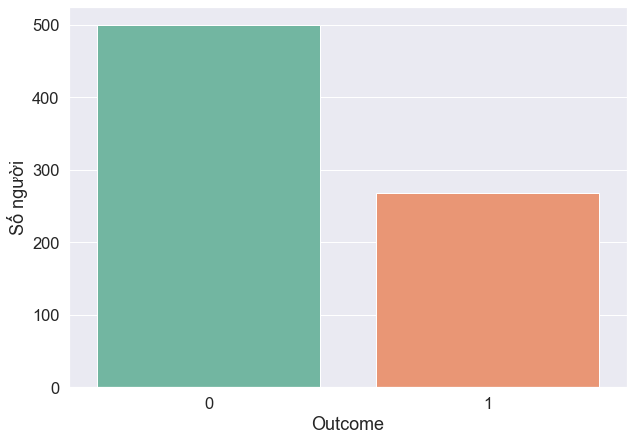

In [11]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=data, palette="Set2")
plt.ylabel('Số người')

## Từ biểu đồ trên, chúng ta có thể thấy rằng:

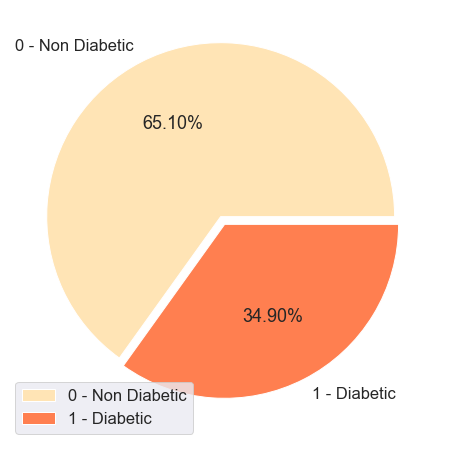

In [12]:
plt.figure(figsize=(8,8))
pieC = data['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

## Chúng ta có thể thấy từ biểu đồ tròn trên:

65,10% trong số 768 phụ nữ Ấn Độ Pima không mắc bệnh tiểu đường

34,90% trong số 768 phụ nữ Ấn Độ Pima mắc bệnh tiểu đường

Text(0, 0.5, 'Số người')

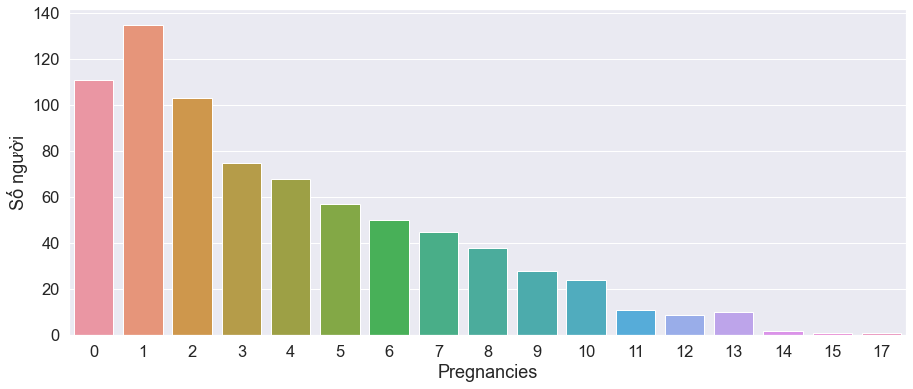

In [13]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(data['Pregnancies'])
plt.ylabel('Số người')

## Biểu đồ trên cho chúng ta biết Số lần mang thai so với Số phụ nữ Ấn Độ Pima

In [14]:
print('Glucose trung bình cho người phụ nữ Pima mắc bệnh tiểu đường: ', data[data['Outcome'] == 1]['Glucose'].mean())

Glucose trung bình cho người phụ nữ Pima mắc bệnh tiểu đường:  141.25746268656715


In [15]:
print('Glucose trung bình cho người phụ nữ Pima không mắc bệnh tiểu đường: ', data[data['Outcome'] == 0]['Glucose'].mean())

Glucose trung bình cho người phụ nữ Pima không mắc bệnh tiểu đường:  109.98


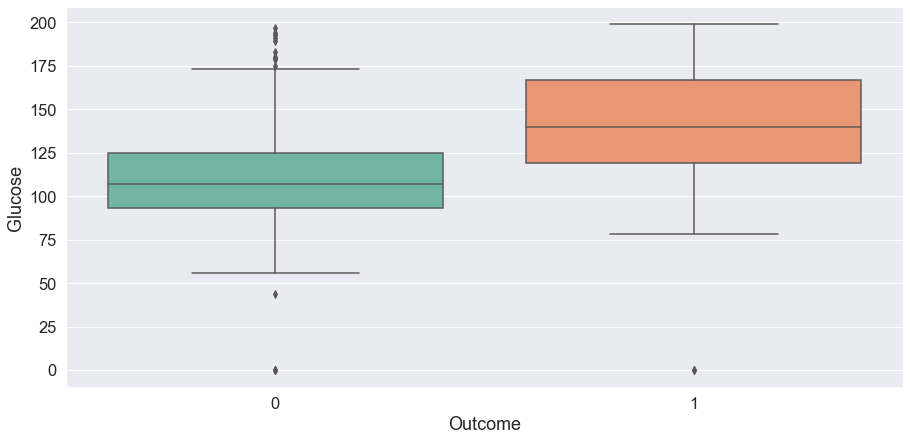

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(data['Outcome'],data['Glucose'], palette="Set2")
sns.set(font_scale = 1.5)

## Người phụ nữ Pima mắc bệnh tiểu đường có mức Glucose cao hơn trong khi người phụ nữ Pima không mắc bệnh tiểu đường có mức Glucose thấp hơn

In [17]:
print('BMI trung bình cho người phụ nữ pima bị tiểu đường: ', data[data['Outcome'] == 1]['BMI'].mean())

BMI trung bình cho người phụ nữ pima bị tiểu đường:  35.14253731343278


In [18]:
print('BMI trung bình cho người phụ nữ pima không bị tiểu đường: ', data[data['Outcome'] == 0]['BMI'].mean())

BMI trung bình cho người phụ nữ pima không bị tiểu đường:  30.30419999999996


## Thang đo BMI tiêu chuẩn là:

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

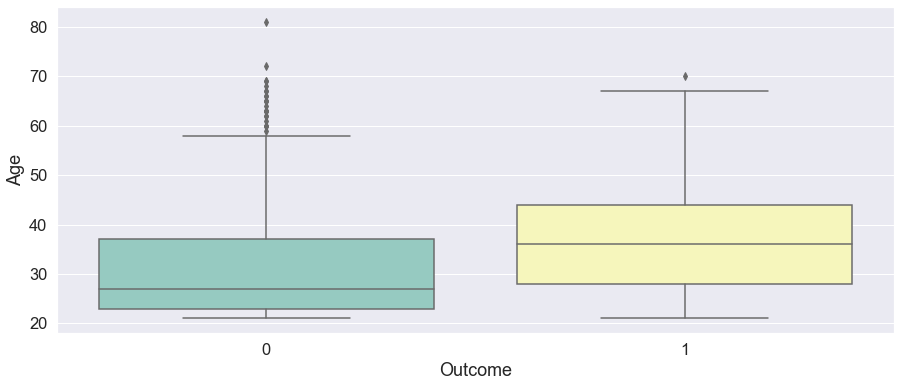

In [19]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.boxplot(data['Outcome'],data['Age'], palette = "Set3")

## Vì vậy, khi tuổi tăng nguy cơ mắc bệnh tiểu đường cũng tăng

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

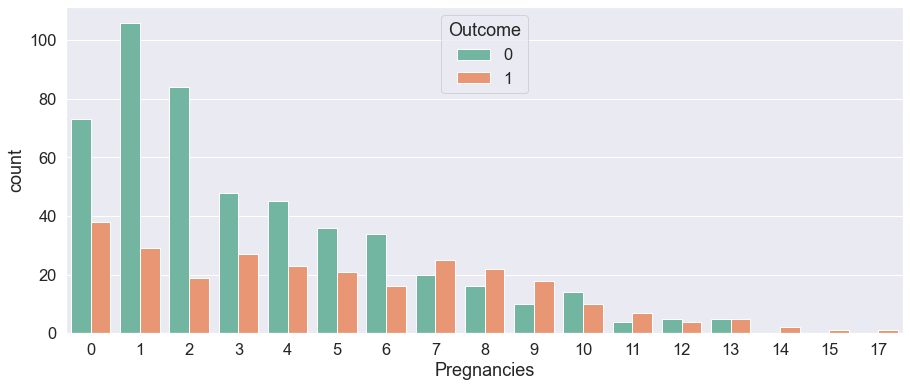

In [20]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = data, palette = 'Set2')

## Phụ nữ Pima ít con có nguy cơ mắc bệnh tiểu đường thấp

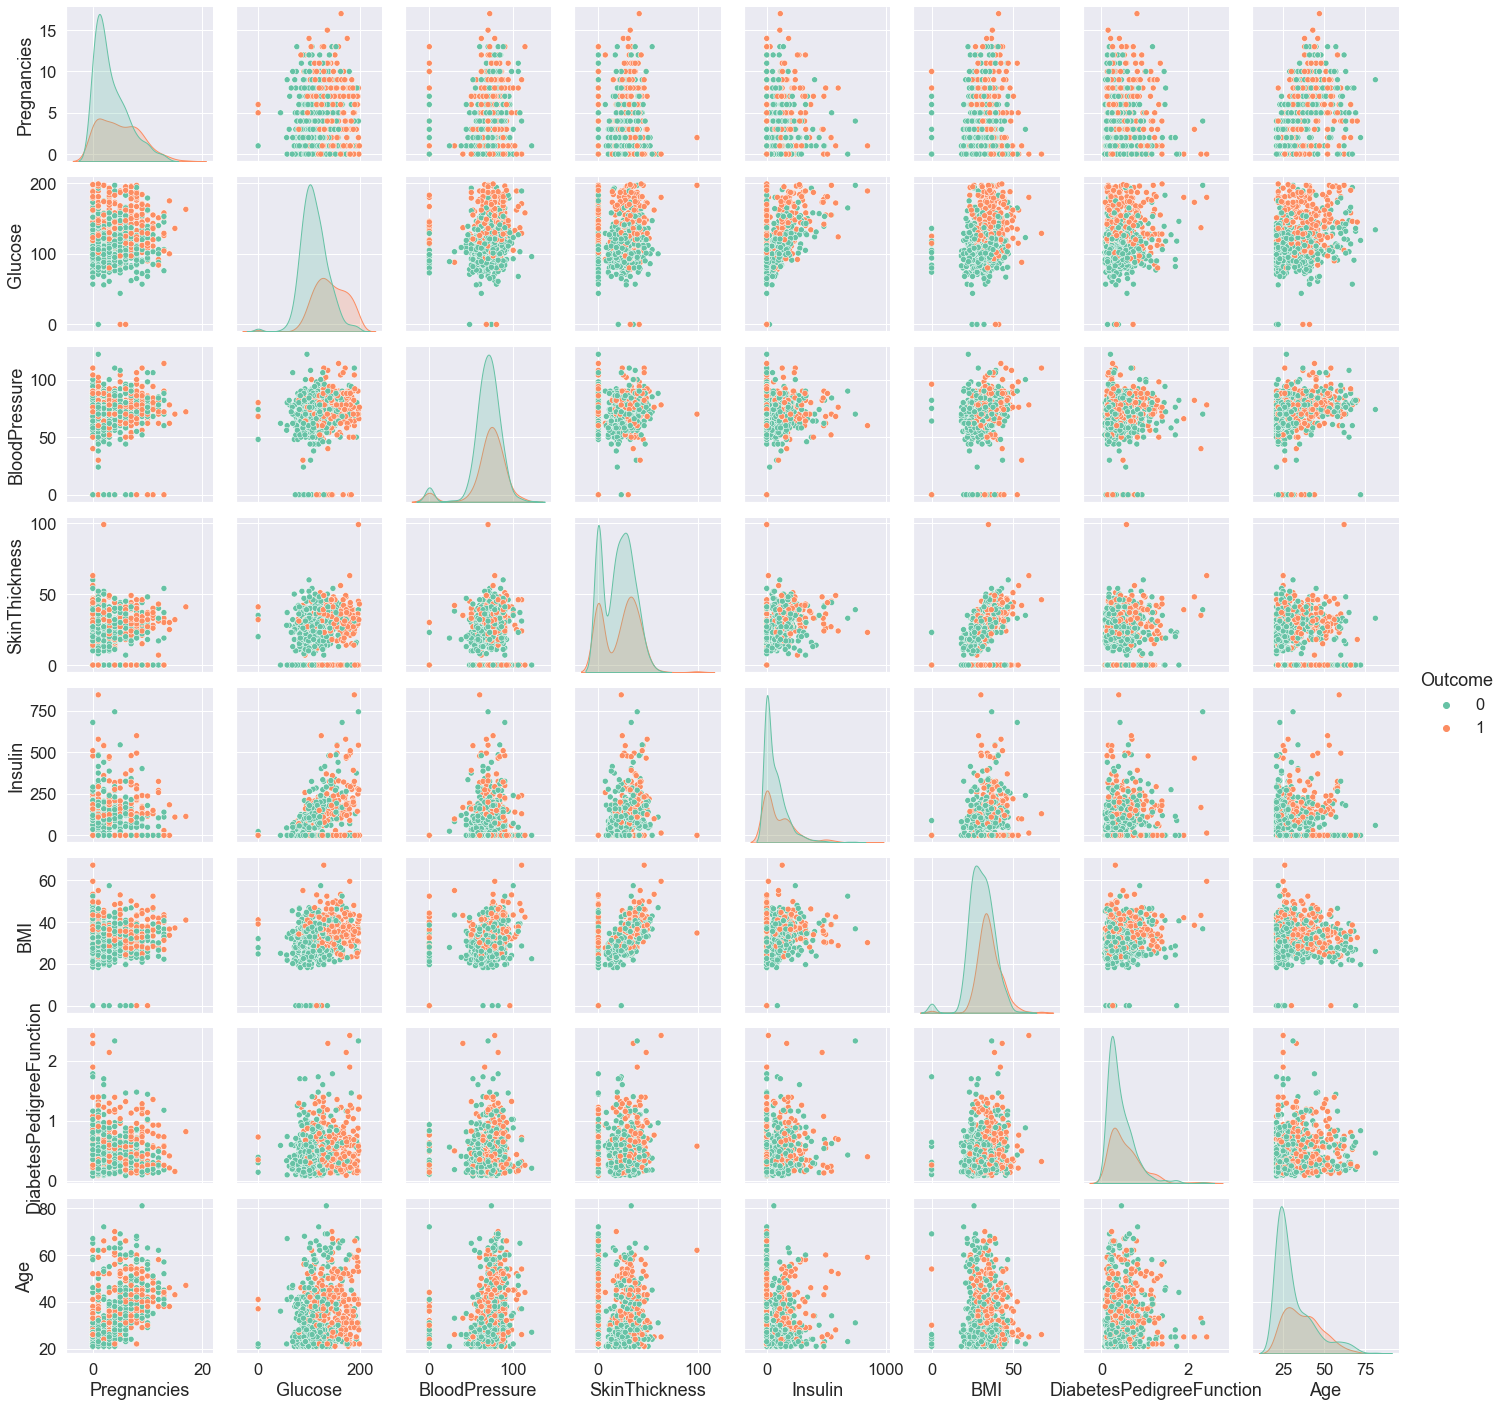

In [21]:
sns.set(font_scale = 1.5)
sns.pairplot(data = data, hue = 'Outcome', diag_kind = 'kde', palette = 'Set2')

## Biểu đồ phân tán cho thấy mối quan hệ giữa từng thuộc tính hoặc các tính năng được thực hiện theo từng cặp. Nhìn vào biểu đồ phân tán, chúng ta có thể nói rằng không có hai thuộc tính nào có thể phân tách rõ ràng hai loại kết quả.

In [22]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

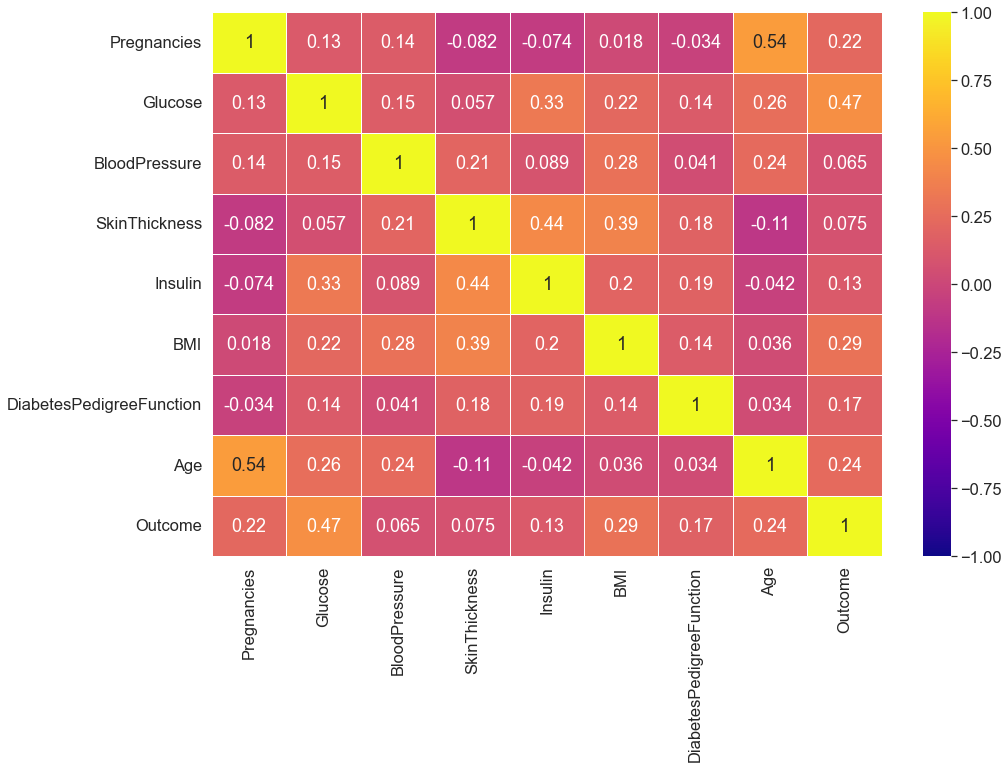

In [23]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

## Từ biểu đồ nhiệt trên, chúng ta có thể kết luận như sau:

In [24]:
# chia dữ liệu
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [25]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [26]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
#s the data

smote = SMOTE()
X_SMOTE, Y_SMOTE = smote.fit_resample(X, Y)

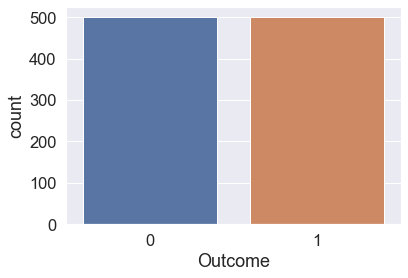

In [28]:
sns.countplot(Y_SMOTE, label="Count")
plt.show()

# Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_SMOTE, Y_SMOTE, test_size= 0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (800, 8) (200, 8)


In [32]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.02453224, 0.12229062, 0.03512107, 0.03326188, 0.07777459,
       0.09307636, 0.03116079, 0.08804151])

In [33]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Glucose                     0.122291
BMI                         0.093076
Age                         0.088042
Insulin                     0.077775
BloodPressure               0.035121
SkinThickness               0.033262
DiabetesPedigreeFunction    0.031161
Pregnancies                 0.024532
dtype: float64

<AxesSubplot:>

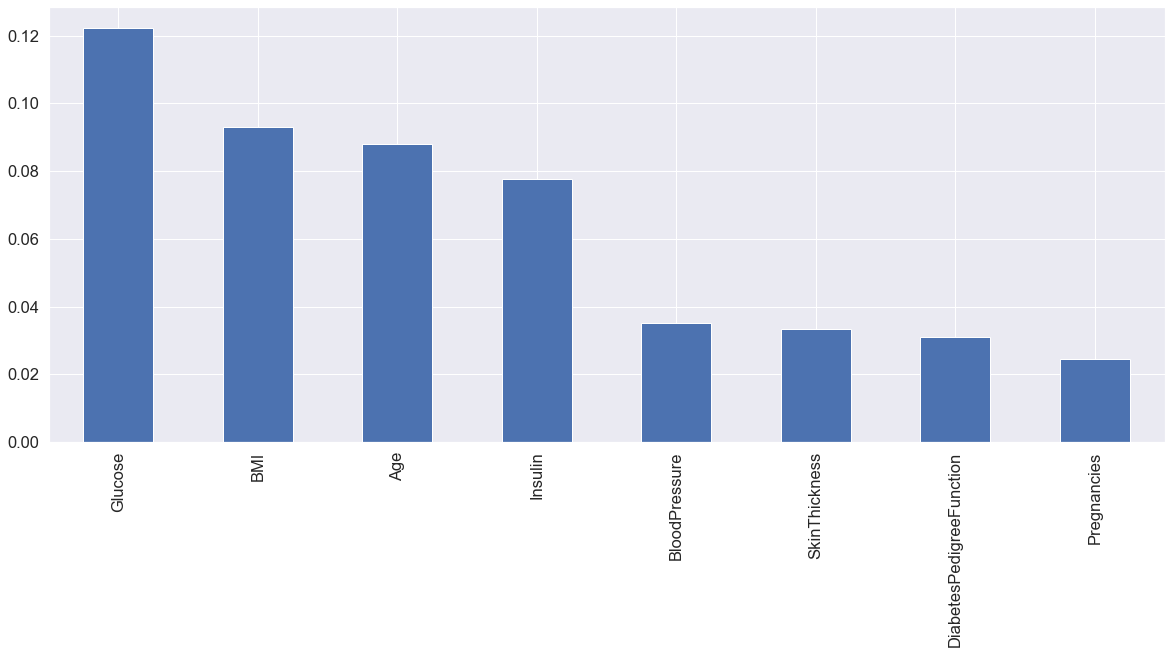

In [34]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# Tìm mô hình tốt nhất bằng GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'random_forest' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [5, 10, 15, 20, 25], 
                'max_depth': [3, 5, 7, 9, 11, 13]
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'C': [0.001, 0.01, 0.1, 1.],
                'penalty': ["l1", "l2"]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [3, 5, 7, 9, 11, 13]
            }
        }
    }
    scores = []
    #cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=2)
    cv = KFold(n_splits=5, random_state=2, shuffle=True)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_SMOTE,Y_SMOTE)

,model,best_score,best_params
0,random_forest,0.80600,"{'max_depth': 11, 'n_estimators': 15}"
1,logistic_regression,0.75000,"{'C': 0.1, 'penalty': 'l2'}"
2,decision_tree,0.28441,{'max_depth': 3}


# Sử dụng xác thực chéo K Fold để đo độ chính xác của mô hình

In [36]:
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=2, shuffle=True)

cross_val_score(RandomForestClassifier(), X_SMOTE, Y_SMOTE, cv=cv)

array([0.845, 0.745, 0.845, 0.805, 0.83 ])

# Xây dựng một mô hình Random Forest

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

# Đánh giá độ chính xác của mô hình

Accuracy Score

In [39]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

1.0


In [40]:
print('Accuracy score of the training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy score of the training data :  100.0 %


In [41]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

0.83


In [42]:
print('Accuracy score of the test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy score of the test data :  83.0 %


Precision

In [43]:
from sklearn.metrics import precision_score

In [44]:
# precision for training data predictions
precision_train = precision_score(Y_train, X_train_prediction)
print('Training data Precision =', precision_train)

Training data Precision = 1.0


In [45]:
# precision for test data predictions
precision_test = precision_score(Y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.8504672897196262


Recall

In [46]:
from sklearn.metrics import recall_score

In [47]:
# recall for training data predictions
recall_train = recall_score(Y_train, X_train_prediction)
print('Training data Recall =', recall_train)

Training data Recall = 1.0


In [48]:
# recall for test data predictions
recall_test = recall_score(Y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.8348623853211009


F1 Score

In [49]:
from sklearn.metrics import f1_score

In [50]:
# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)

Training data F1 Score = 1.0


In [51]:
# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.8348623853211009


Precision, Recall, & F1 Score - function

In [52]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [53]:
# classification metrics for training data
precision_recall_f1_score( Y_train, X_train_prediction,)

Precision = 1.0
Recall = 1.0
F1 Score = 1.0


In [54]:
# classification metrics for test data
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.8504672897196262
Recall = 0.8348623853211009
F1 Score = 0.8425925925925924


# Xây dựng hệ thống dự đoán

In [55]:
# input_data = (8,183,64,0,0,23.3,0.672,32) #mắc bệnh tiểu đường
input_data = (1,89,66,23,94,28.1,0.167,21)   #không mắc bệnh tiểu đường

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('Người này không mắc bệnh tiểu đường')
else:
    print('Người này đã mắc bệnh tiểu đường')

[[ 1.    89.    66.    23.    94.    28.1    0.167 21.   ]]
[0]
Người này không mắc bệnh tiểu đường


In [56]:
import joblib as jb

In [57]:
jb.dump(model, 'final_model.sav')

['final_model.sav']